## Iris Classfication ##
This is an adaptation of the code available at https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn/notebook

Import necessary libraries

In [1]:
#we will use numpy and pandas as our main data manipulation libraries to carry out operations on data.
import numpy as np
import pandas as pd

#We will use matplotlib and seaborn as our fundamental visualization library
import seaborn as sns
import matplotlib.pyplot as plt
#Sklearn has many datasets built in, we are using iris out of them.
from sklearn.datasets import load_iris
#inline to allow seamless integration with web UI of IPython.
%matplotlib inline     


In [2]:
#Allow display of all columns
pd.set_option('display.max_columns',None)

In [3]:
#Load the iris data in a variable
iris_data=load_iris()

#### Lets list down some important aspect of the dataset to better know what is it.####

In [4]:
#type of the dataset
type(iris_data)

sklearn.utils._bunch.Bunch

In [5]:
#list of keys in the bunch
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
#list of features in the data sets
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Names of classes
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [8]:
#Convert data to a pd dataframe using data and feature names
iris_df=pd.DataFrame(data=iris_data['data'],columns=iris_data['feature_names'])

In [9]:
# See the top rows with headings
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#Add the type of Iris to each entry
iris_df['iris_type']=iris_data['target']

In [11]:
#See the updated head
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#Assign an iris name
#as a lamda function
#Using Lambda Function
iris_df['iris_name']=iris_df['iris_type'].apply(lambda x: 'sentosa' if x==0 else ('versicolor' if x==1 else 'virginica'))
#as a regular function
def f(x):
    if x == 0:
        val = 'sentosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val
iris_df['test']=iris_df['iris_type'].apply(f) #We will delete this later, because it is just a place holder for elaboration.

In [13]:
# Inspect the dataframe again
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type,iris_name,test
0,5.1,3.5,1.4,0.2,0,sentosa,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa,sentosa


In [14]:
#Remove duplicated column which was created earlier while assigning the iris_type
iris_df.drop(['test'],axis=1,inplace=True)
# Inspect the updated head
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type,iris_name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


In [15]:
# Retrieve some information on the Dataframe
iris_df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
iris_type            150
iris_name            150
dtype: int64

In [16]:
# Retrieve some information on the Dataframe
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris_type          150 non-null    int32  
 5   iris_name          150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [17]:
# Determine the shape of Dataframe

iris_df.shape

(150, 6)

In [18]:
# Retrieve some statistics information on the Dataframe

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
# Retrieve some statistical information on the Dataframe per iris type

iris_df.groupby('iris_name').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
iris_name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
iris_name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
iris_name                                                                   
sentosa                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            \
                      count   mean       std  min  25%  50%  75%  max   
iris_name                                                               
sentosa                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6   
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8   
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5   

           iris_type                                     
               count mean  std  min  25%  50%  75%  max  
iris_name                                                
sentosa         50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
versicolor      50.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
virginica       50.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [20]:
# Display all columns
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'iris_type', 'iris_name'],
      dtype='object')

In [21]:
# For use with Seaborn violin plot, lets define a function to iterative display a chart
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    sns.violinplot(x=iris_df['iris_name'],y=y2,data=iris_df)
    
    


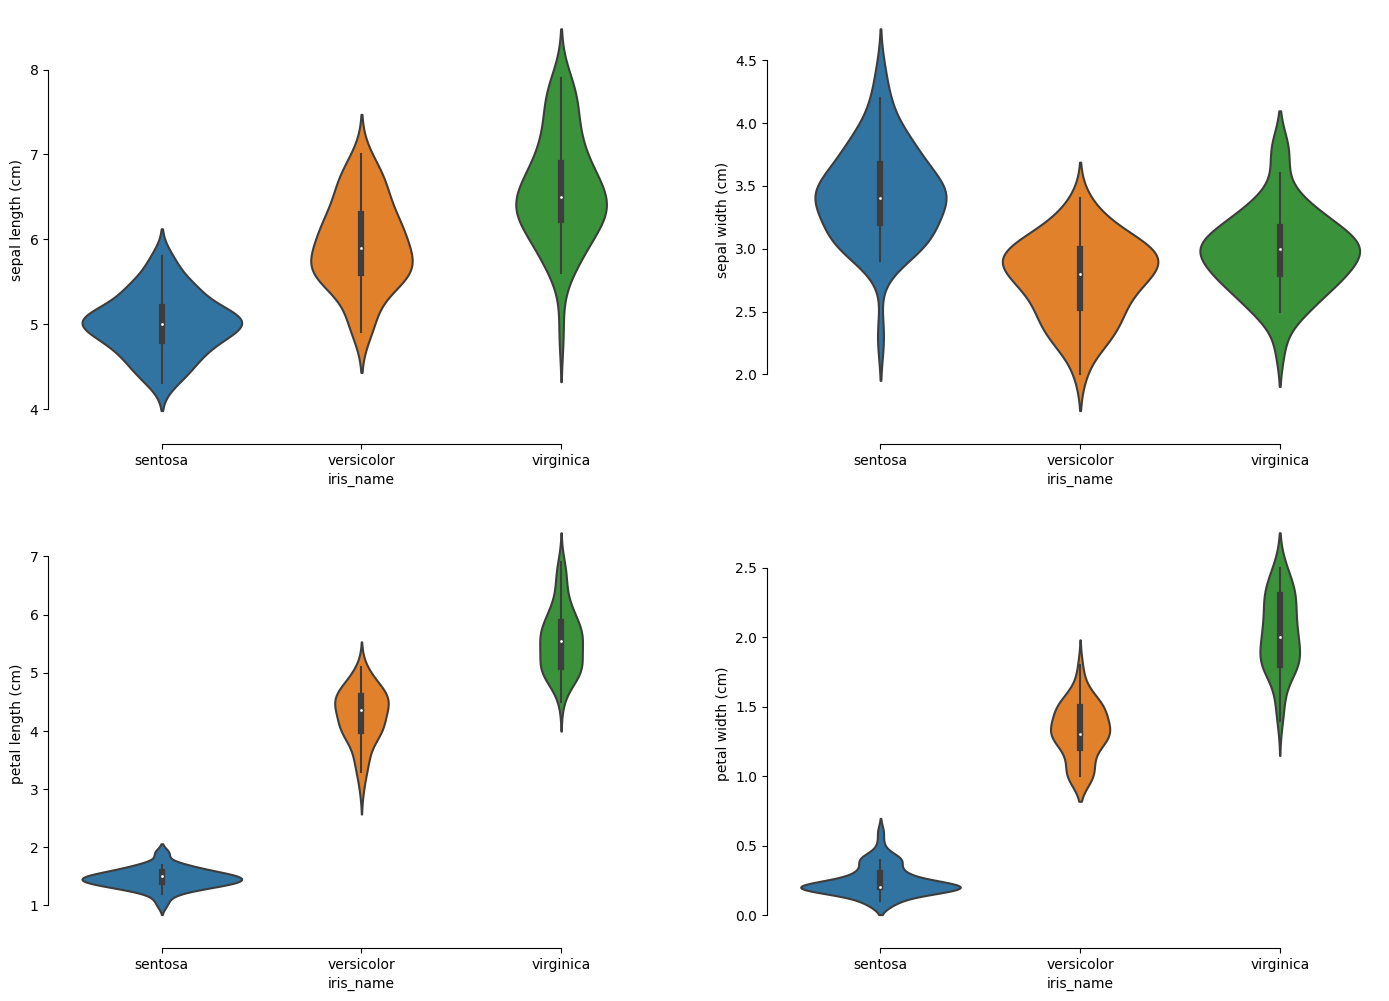

In [22]:
# Run loop to iterate over iris dataframe and display relevant chart by calling the previously 
#defined function on each iteration
plt.figure(figsize=(17,12))
i=1 
for measurement in iris_df.columns[:-2]: 
    #We are considering only first four columns for this visualization 
    #(Sepal length, sepal width, Petal Length and Petal Width)
    plot_violin(measurement,i)
    sns.despine(offset=10,trim=True)
    i=i+1

C:\Users\Admin\anaconda3\envs\Based\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


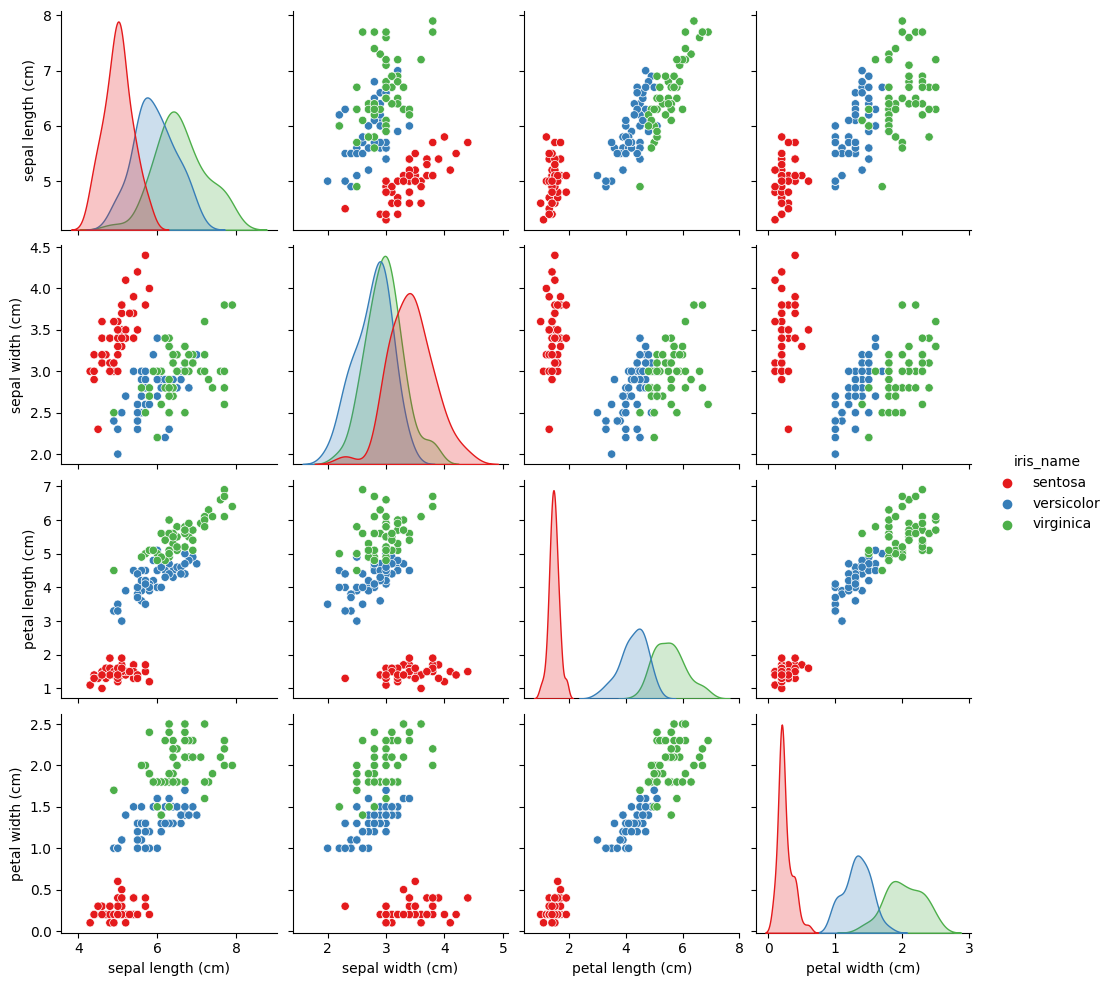

In [23]:
#Using Searborn pairplot to visualize 4 characteristics of three types of iris.
sns.pairplot(iris_df,hue='iris_name',palette='Set1',vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [24]:
#See corelations of 4 columns
iris_df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

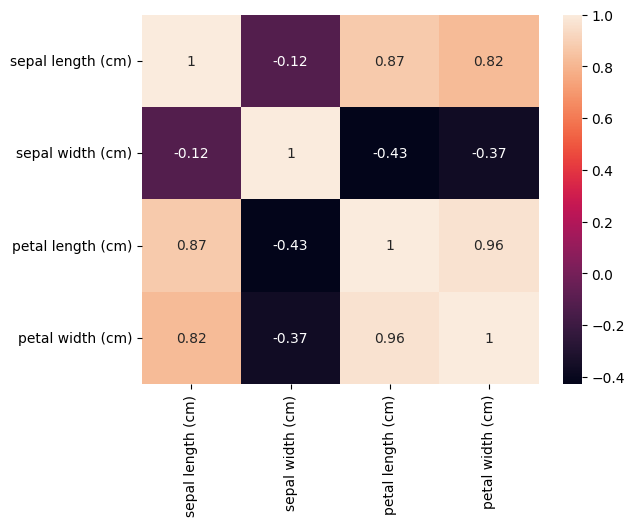

In [25]:
#Generate HeatMap using the corelation values. -ve values mean no corelation.
sns.heatmap(iris_df.iloc[:,:4].corr(),annot=True)

#### Applying the ML here ####

In [26]:
#Import train_test_split to split the data in training and test subsets
from sklearn.model_selection import train_test_split


In [27]:
#Create the full data frames for Data and classes
X=iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = iris_df['iris_name']


In [28]:
#Apply the split, random_state=0 means do not randomly chose the split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
#Import the KNeighborsClassifier as our algorithm to apply
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #use 3 neighbors

In [30]:
#train the model on train data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Recieve the predictions on test values
y_predict=knn.predict(X_test)

In [32]:
#Print the predictions
y_predict

array(['virginica', 'versicolor', 'sentosa', 'virginica', 'sentosa',
       'virginica', 'sentosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'sentosa', 'versicolor', 'versicolor', 'sentosa',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'sentosa',
       'virginica', 'sentosa', 'sentosa', 'versicolor', 'versicolor',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'virginica',
       'virginica', 'versicolor', 'sentosa', 'virginica'], dtype=object)

In [33]:
#Print the accuracy
accuracy=knn.score(X_test, y_test)
print(f'Our model accuracy with k=3 is: {accuracy}')


Our model accuracy with k=3 is: 0.9736842105263158


In [34]:
#Apply loop with increasing number of neighbors to check the accuracy
#At the same time, print time it took to complete the process to arrive at the time complexity requirements.
import time
time_list=[]
min_time=1000
k_at_min_time=0
max_accuracy=-1
for k in range(1,50):
    start_time = time.time() # Record the start time
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    accuracy=knn.score(X_test, y_test)
    if max_accuracy < accuracy:
        max_accuracy=accuracy
        k_at_max_accuracy=k
        
    #print(f'Our model accuracy with k={ k } is: {accuracy}')
    end_time = time.time()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    if min_time> execution_time:
        min_time=execution_time
        k_at_min_time=k
    time_list.append(execution_time)
    #print(f"Iteration {k}: Execution time = {execution_time} seconds")
print(f"Minimum time required is: { min_time } at k= {k_at_min_time}")
print(f"Max accuracy is : { max_accuracy } at k= {k_at_max_accuracy}")

Minimum time required is: 0.004996299743652344 at k= 38
Max accuracy is : 0.9736842105263158 at k= 1


We see there is no difference in accuracy from 1<=n<=23.
Also, We see there is loss in accuracy when we go above 24.

In [35]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
# also thanks https://www.youtube.com/watch?v=2osIZ-dSPGE&ab_channel=codebasics for his video, 
#letting me know for this code
def print_confusion_matrix(confusion_matrix, class_names, figsize = (9,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Note that due to returning the created figure object, when this funciton is called in a
    notebook the figure willl be printed twice. To prevent this, either append ; to your
    function call, or modify the function by commenting out the return expression.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label', fontsize = 12)
    plt.title('Confusion Matrix', fontsize = 16)
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    # return fig

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

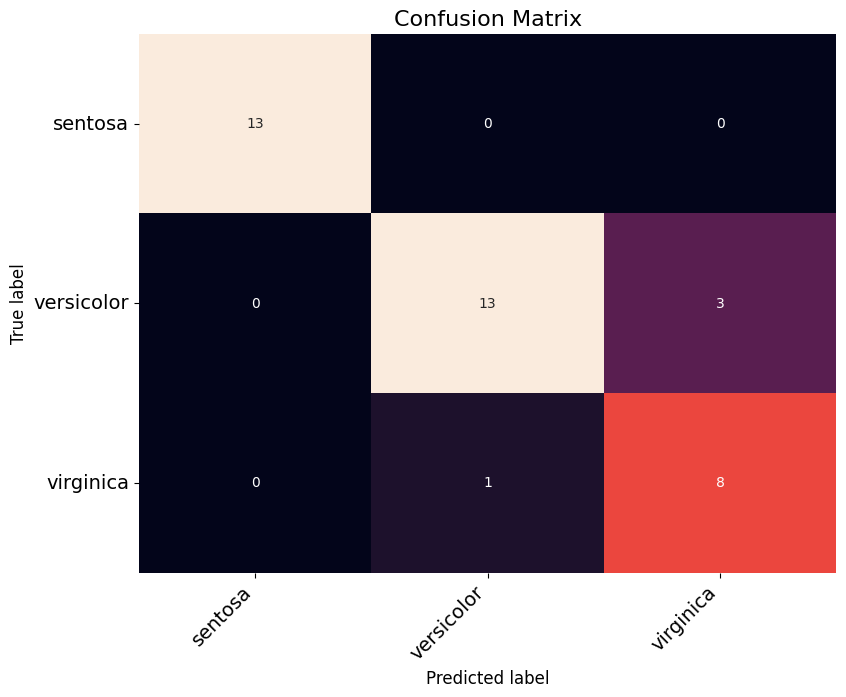

In [37]:
print_confusion_matrix(confusion_matrix(y_test,y_predict),['sentosa', 'versicolor', 'virginica'])

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       0.93      0.81      0.87        16
   virginica       0.73      0.89      0.80         9

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.91      0.89      0.90        38



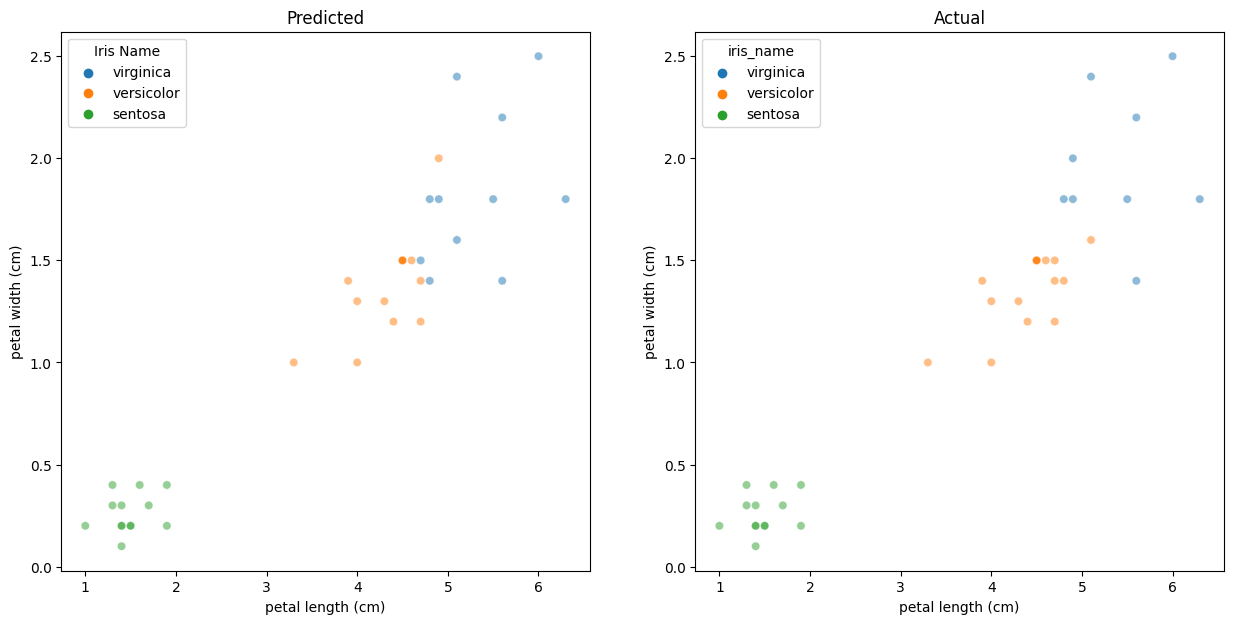

In [39]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,2,1)
ax1=sns.scatterplot(x=X_test['petal length (cm)'], y = X_test['petal width (cm)'],hue=y_predict,alpha=0.5)
plt.title('Predicted')
plt.legend(title='Iris Name')



ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot(x = X_test['petal length (cm)'], y = X_test['petal width (cm)'], hue = y_test, alpha = 0.5)
plt.title('Actual');


#Here, lets use some other Algorithms. And see what results do we have

In [40]:

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [41]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_predictions)
print("Decision Tree Accuracy:", dtree_accuracy)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

KNN Accuracy: 0.9736842105263158
Decision Tree Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9736842105263158
SVM Accuracy: 0.9736842105263158


In [42]:
#Lets Generate reports on each algorith
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dtree_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))



KNN Classification Report:
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


Decision Tree Classification Report:
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


Random Forest Classification Report:
              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       1.00  

## Manual KNN Implementation, Just for fun... ##

In [43]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(     np.sum(    ((x1 - x2) ** 2 )   )     )

class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Initialize and fit the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Example prediction for a single data point
example_data_point = np.array([5.1, 3.5, 1.4, 0.2])
predicted_class = knn.predict([example_data_point])[0]
predicted_species = iris.target_names[predicted_class]
print(f"Predicted Species for Example Data Point: {predicted_species}")

Accuracy: 1.00
Predicted Species for Example Data Point: setosa


### Lets Implement other important (train_test_split, find_most_common_label) functions by hand ###

In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define a custom train_test_split function
def custom_train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    test_size = int(num_samples * test_size)

    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]

    return X_train, X_test, y_train, y_test

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_most_common_label(k_nearest_labels):
    label_count = {}
    
    for label in k_nearest_labels:
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
    
    most_common_label = None
    max_count = 0
    
    for label, count in label_count.items():
        if count > max_count:
            most_common_label = label
            max_count = count
    
    return most_common_label

# Define KNN classifier using custom methods
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Use custom function to find the most common label
        most_common_label = find_most_common_label(k_nearest_labels)
        
        return most_common_label

# Split the dataset into training and testing sets using the custom function
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98
